In [1]:
#如果没有安装pillow，使用pip install进行安装
#!pip install pillow
import numpy as np
from PIL import Image

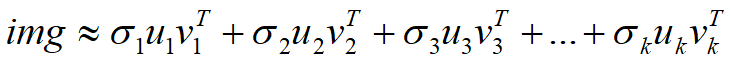

In [2]:
#图片压缩函数
def imgCompress(channel,percent):
    U, sigma, V_T = np.linalg.svd(channel)
    #m,n为压缩后矩阵的尺寸（行数和列数）
    m = U.shape[0]
    n = V_T.shape[0]
    #压缩后的数据存储在reChannel矩阵当中，先初始化为一个全零的矩阵
    reChannel = np.zeros((m,n))
    #根据图像复原公式
    for k in range(len(sigma)):
        reChannel = reChannel + sigma[k]* np.dot(U[:,k].reshape(m,1),V_T[k,:].reshape(1,n))
        #如果奇异值数量比例已经达到了要求，则退出循环
        if float(k)/len(sigma) > percent:
            reChannel[reChannel < 0] = 0
            reChannel[reChannel > 255] = 255
            break
    #rint为四舍五入取整数，相当于round
    return np.rint(reChannel).astype("uint8")

In [4]:
oriImage = Image.open(r'lisa.png', 'r')
imgArray = np.array(oriImage)

R = imgArray[:, :, 0]
G = imgArray[:, :, 1]
B = imgArray[:, :, 2]
A = imgArray[:, :, 3]

for p in [0.001,0.005,0.01,0.02,0.03,0.04,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]:
    reR = imgCompress(R, p)
    reG = imgCompress(G, p)
    reB = imgCompress(B, p)
    reA = imgCompress(A, p)
    reI = np.stack((reR, reG, reB, reA), 2)

    Image.fromarray(reI).save("./results/{}".format(p)+"img.png")